In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

## 중복

In [ ]:
duplicate_rows = df[df.duplicated()]

In [ ]:
duplicate_rows

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
37,2019-12-01 00:01:52 UTC,cart,5700046,1487580009286598681,NaN,runail,0.40,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
55,2019-12-01 00:02:49 UTC,cart,5693501,1487580009445982239,NaN,NaN,0.60,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
61,2019-12-01 00:03:08 UTC,remove_from_cart,5859482,1487580005671109489,NaN,masura,1.60,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
62,2019-12-01 00:03:08 UTC,remove_from_cart,5839671,1487580005671109489,NaN,masura,2.19,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
66,2019-12-01 00:03:10 UTC,remove_from_cart,5859482,1487580005671109489,NaN,masura,1.60,561162056,39cf2227-03ed-421e-9615-7814b9b3c5e6
...,...,...,...,...,...,...,...,...,...
4264589,2020-01-31 23:50:59 UTC,remove_from_cart,5751422,1487580005268456287,NaN,uno,10.95,534672681,80dd5c57-c8b0-4b57-9255-8a6ed43da5e2
4264592,2020-01-31 23:51:06 UTC,remove_from_cart,5869134,1783999064136745198,NaN,cosmoprofi,6.35,534672681,80dd5c57-c8b0-4b57-9255-8a6ed43da5e2
4264683,2020-01-31 23:55:32 UTC,remove_from_cart,5723515,1487580005134238553,NaN,runail,2.35,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb
4264742,2020-01-31 23:59:43 UTC,remove_from_cart,5751422,1487580005268456287,NaN,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47


#각 세션에서 발생한 이벤트 수

In [ ]:
# 세션별 이벤트 수 계산
session_event_count = df.groupby('user_session').size()

# 세션별 이벤트 수 출력
print(session_event_count)

user_session
0000061d-f3e9-484b-8c73-e54f355032a3     1
00000ac8-0015-4f12-996a-be2896323738     1
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04     1
000013d6-68a4-40cf-9452-6577dbfab515    20
00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e     2
                                        ..
ffffeed4-b0dd-499c-ba8c-213a1ab9f50d    34
fffff319-41b2-4937-96bb-ac4aace7c300     1
fffff363-1257-4982-9e4f-da3b99b0719d     1
fffffa85-9968-4a7c-aac4-beb0a1992bbd     8
fffffc08-81e3-4050-9cd6-a5301f79f6f1    11
Length: 4535941, dtype: int64


In [ ]:
session_event_count.describe()

,0
count,1114853.00
mean,4.34
std,13.23
min,1.00
25%,1.00
50%,1.00
75%,3.00
max,2031.00


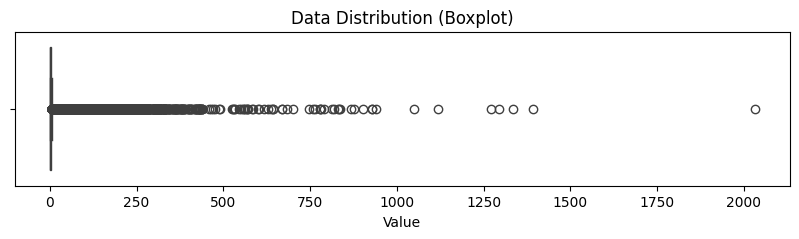

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=session_event_count)
plt.title("Data Distribution (Boxplot)")
plt.xlabel("Value")
plt.show()

In [ ]:
session_event_count[session_event_count == 2031]


,0
user_session,
774a7c64-079f-450c-be4a-625aeea3350d,2031


In [ ]:
max_session=df[df['user_session']=='774a7c64-079f-450c-be4a-625aeea3350d']

In [ ]:
max_session

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
442463,2019-11-04 16:08:48 UTC,view,5325.00,1487580009546645504.00,NaN,runail,7.14,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
442602,2019-11-04 16:09:15 UTC,view,5024.00,1487580009546645504.00,NaN,runail,27.32,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
443334,2019-11-04 16:14:49 UTC,cart,5876797.00,1487580010100293632.00,NaN,jessnail,1.43,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
443480,2019-11-04 16:15:58 UTC,cart,5700137.00,1487580008263189504.00,NaN,concept,9.37,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
443579,2019-11-04 16:16:41 UTC,cart,5815036.00,1487580008288355328.00,NaN,NaN,5.22,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
...,...,...,...,...,...,...,...,...,...
459889,2019-11-04 18:03:19 UTC,remove_from_cart,5776152.00,1487580011534745600.00,NaN,carmex,5.56,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
459890,2019-11-04 18:03:19 UTC,remove_from_cart,5867582.00,1487580011534745600.00,NaN,kims,25.38,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
459892,2019-11-04 18:03:21 UTC,remove_from_cart,5887766.00,1487580013279576320.00,NaN,NaN,4.27,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d
459903,2019-11-04 18:03:29 UTC,remove_from_cart,5890130.00,1487580013279576320.00,NaN,NaN,4.33,500179293.00,774a7c64-079f-450c-be4a-625aeea3350d


In [ ]:
max_session['event_type'].value_counts()

,count
event_type,
remove_from_cart,1744
cart,283
view,4


## 세션 지속 시간

In [ ]:
df['event_time'] = pd.to_datetime(df['event_time'])
user_id = 500179293.00
user_data = df[df['user_id'] == user_id]

session_duration = user_data.groupby('user_session').agg(
    session_start=('event_time', 'min'),
    session_end=('event_time', 'max')
)

# 세션의 지속 시간 계산 (초 단위)
session_duration['duration'] = (session_duration['session_end'] - session_duration['session_start']).dt.total_seconds()

print(session_duration)

                                                 session_start  \
user_session                                                     
009c53a6-25e3-4e4a-81d8-7d02f5b3ce1a 2019-11-04 09:44:04+00:00   
0c2b452e-214f-4cff-af21-d60fbc6770af 2019-12-15 05:46:09+00:00   
0e4174cf-1597-4909-bd21-9ff23fabf625 2019-11-06 08:20:00+00:00   
1e029342-ffe3-4271-b152-3260a9a5ff7c 2019-12-15 06:12:25+00:00   
2356d0bf-006e-4585-bfb6-2f92e36f5bee 2019-11-02 16:38:47+00:00   
391da1e1-dd48-4fe5-85cc-1b70de420bfa 2019-11-04 19:35:08+00:00   
4c0d7ec5-cf5b-49ba-acdc-9ed048689dd3 2019-11-01 19:12:27+00:00   
5ce50ea7-f445-4fc6-b1b9-8576f3191908 2019-12-02 17:30:05+00:00   
67634253-001e-46f0-b28b-a8915406e172 2019-12-08 19:52:03+00:00   
774a7c64-079f-450c-be4a-625aeea3350d 2019-11-04 16:08:48+00:00   
7eecece7-2be8-4e04-9fd5-4245c6cefa6a 2019-11-05 08:55:18+00:00   
9832b5e7-fb1f-4684-9ec8-0d34d7e7c1e6 2019-12-02 12:49:05+00:00   
99fa9c9a-d03d-4267-9c52-d77f1c94a672 2019-11-06 17:39:41+00:00   
abf57c93-c

In [ ]:
# 'event_time'을 datetime으로 변환
df['event_time'] = pd.to_datetime(df['event_time'])

# 데이터 정렬
df = df.sort_values(by=['user_session', 'event_time'])

# 각 user_session 별 첫 번째와 마지막 이벤트 시간 구하기
session_durations = df.groupby('user_session').agg({
    'event_time': ['first', 'last']
}).reset_index()

# 컬럼 이름 정리
session_durations.columns = ['user_session', 'first_event_time', 'last_event_time']

# 지속 시간 계산
session_durations['duration'] = session_durations['last_event_time'] - session_durations['first_event_time']

print(session_durations)

                                 user_session          first_event_time  \
0        00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04 2019-11-05 07:57:05+00:00   
1        00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e 2019-12-20 20:37:29+00:00   
2        00001ca1-f2df-4572-b0b8-e752e2064aae 2020-01-01 19:09:23+00:00   
3        00002b0e-d7f7-454e-8386-431c4021a9f6 2019-12-18 06:48:39+00:00   
4        00002f36-401d-4bc5-bac6-1a683f52ac2b 2019-12-08 09:17:32+00:00   
...                                       ...                       ...   
1114848  ffffbe0a-d2c2-47c7-afab-680bfdfda50d 2019-11-02 11:47:34+00:00   
1114849  ffffbfc6-8ddb-42d5-b463-995b7e7494ef 2019-12-24 18:57:10+00:00   
1114850  ffffdbda-78e9-4684-b895-e79722a658d9 2019-12-12 19:07:01+00:00   
1114851  fffff319-41b2-4937-96bb-ac4aace7c300 2019-12-19 13:25:56+00:00   
1114852  fffff363-1257-4982-9e4f-da3b99b0719d 2019-12-03 06:53:01+00:00   

                  last_event_time        duration  
0       2019-11-05 07:57:05+00:00 0 days 00:00:

In [ ]:
session_durations['duration'].describe()

,duration
count,1114853
mean,0 days 01:43:10.811445993
std,1 days 17:08:37.992319129
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,0 days 00:01:24
max,123 days 11:32:23


In [ ]:
zero_duration_sessions = session_durations[session_durations['duration'] == pd.Timedelta(seconds=0)]

In [ ]:
zero_duration_sessions

,user_session,first_event_time,last_event_time,duration
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,2019-11-05 07:57:05+00:00,2019-11-05 07:57:05+00:00,0 days
2,00001ca1-f2df-4572-b0b8-e752e2064aae,2020-01-01 19:09:23+00:00,2020-01-01 19:09:23+00:00,0 days
4,00002f36-401d-4bc5-bac6-1a683f52ac2b,2019-12-08 09:17:32+00:00,2019-12-08 09:17:32+00:00,0 days
5,000035aa-dc4c-4703-aa6e-042ce96c6aef,2019-12-29 20:26:08+00:00,2019-12-29 20:26:08+00:00,0 days
11,000090e1-da13-42b1-a31b-91a9ee5e6a88,2020-02-01 14:58:19+00:00,2020-02-01 14:58:19+00:00,0 days
...,...,...,...,...
1114848,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,2019-11-02 11:47:34+00:00,2019-11-02 11:47:34+00:00,0 days
1114849,ffffbfc6-8ddb-42d5-b463-995b7e7494ef,2019-12-24 18:57:10+00:00,2019-12-24 18:57:10+00:00,0 days
1114850,ffffdbda-78e9-4684-b895-e79722a658d9,2019-12-12 19:07:01+00:00,2019-12-12 19:07:01+00:00,0 days
1114851,fffff319-41b2-4937-96bb-ac4aace7c300,2019-12-19 13:25:56+00:00,2019-12-19 13:25:56+00:00,0 days


## 구매 유저

In [ ]:
# 각 user_id에 대해 purchase 이벤트 존재 여부 확인
user_purchase = df.groupby('user_id')['event_type'].apply(lambda x: (x == 'purchase').any()).reset_index()

# purchase 이벤트가 있는 사용자 수와 없는 사용자 수 계산
purchase_exists = user_purchase['event_type'].sum()
purchase_not_exists = len(user_purchase) - purchase_exists

# 비율 계산
total_users = len(user_purchase)
purchase_ratio = purchase_exists / total_users
no_purchase_ratio = purchase_not_exists / total_users

# 결과 출력
print(f"Purchase 이벤트가 있는 사용자 비율: {purchase_ratio:.2%}")
print(f"Purchase 이벤트가 없는 사용자 비율: {no_purchase_ratio:.2%}")

Purchase 이벤트가 있는 사용자 비율: 6.74%
Purchase 이벤트가 없는 사용자 비율: 93.26%


## 구매 유저 데이터

In [ ]:
purchase_df = df[df['event_type'] == 'purchase']

In [ ]:
purchase_df.describe()

,product_id,category_id,price,user_id
count,1287007.00,1287007.00,1287007.00,1287007.00
mean,5439027.43,1551256695218272256.00,4.93,511927675.53
std,1381411.80,167407928173479552.00,8.92,93565209.61
min,3762.00,1487580004807082752.00,-79.37,9794320.00
25%,5712575.00,1487580005855658752.00,1.59,468907816.00
50%,5809307.00,1487580008246412288.00,3.00,545998157.00
75%,5854123.00,1487580013011140864.00,5.40,574757344.00
max,5932583.00,2242903426784559104.00,327.78,622073202.00


In [ ]:
purchase_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
557,2019-12-01 00:17:50 UTC,purchase,4554,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
558,2019-12-01 00:17:50 UTC,purchase,4600,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
559,2019-12-01 00:17:50 UTC,purchase,4607,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
560,2019-12-01 00:17:50 UTC,purchase,4640,1487580011157258342,NaN,runail,0.37,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
561,2019-12-01 00:17:50 UTC,purchase,4689,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9


In [ ]:
purchase_df['price'].describe()

,price
count,1287007.00
mean,4.93
std,8.92
min,-79.37
25%,1.59
50%,3.00
75%,5.40
max,327.78


In [ ]:
purchase_df=purchase_df[purchase_df['price']>0]

In [ ]:
purchase_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
557,2019-12-01 00:17:50 UTC,purchase,4554,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
558,2019-12-01 00:17:50 UTC,purchase,4600,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
559,2019-12-01 00:17:50 UTC,purchase,4607,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
560,2019-12-01 00:17:50 UTC,purchase,4640,1487580011157258342,NaN,runail,0.37,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
561,2019-12-01 00:17:50 UTC,purchase,4689,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
...,...,...,...,...,...,...,...,...,...
4264714,2020-01-31 23:58:26 UTC,purchase,5730206,1487580005092295511,NaN,NaN,10.32,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e
4264715,2020-01-31 23:58:26 UTC,purchase,5861342,1487580010645553231,NaN,NaN,1.90,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e
4264716,2020-01-31 23:58:26 UTC,purchase,5867185,1487580007910867929,NaN,staleks,11.43,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e
4264717,2020-01-31 23:58:26 UTC,purchase,5877766,1605161575889502297,NaN,NaN,4.76,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e


In [ ]:
purchase_df['price'].describe()

,price
count,1286880.00
mean,4.94
std,8.92
min,0.05
25%,1.59
50%,3.00
75%,5.40
max,327.78


#### 최고가 브랜드

In [ ]:
purchase_df[purchase_df['price']==327.78]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1866301,2019-12-15 10:33:46 UTC,purchase,5906221,1487580006300255120,NaN,strong,327.78,555396635,22703147-817d-4505-9a1c-1c7514e6eb7c
2436687,2019-12-19 16:46:14 UTC,purchase,5906221,1487580006300255120,NaN,strong,327.78,587840665,668f02ae-f645-199b-0199-baeaa92143b6
1184512,2020-02-08 19:05:54 UTC,purchase,5906221,1487580006300255120,NaN,strong,327.78,610327041,8a70ec89-41f3-4733-9e74-2710ce5380fb
3676587,2020-02-26 15:31:17 UTC,purchase,5906221,1487580006300255120,NaN,strong,327.78,612148090,52c9eab9-f518-4844-94e0-019b6d07bb70
2346897,2020-01-19 03:56:22 UTC,purchase,5906221,1487580006300255120,NaN,strong,327.78,437348045,1eea51de-ae14-f1e7-3c35-3185a9a09cc2


In [ ]:
stong=df[df['brand']=='strong']

In [ ]:
stong['price'].describe()

,price
count,60713.00
mean,197.36
std,42.33
min,5.38
25%,187.30
50%,194.44
75%,207.94
max,327.78


In [ ]:
top10_brands = purchase_df['brand'].value_counts().sort_values(ascending=False).head(10)

print(top10_brands)

brand
runail       111408
irisk         73806
masura        49751
grattol       49542
bpw.style     37943
ingarden      27411
estel         19438
uno           17586
freedecor     17467
italwax       17105
Name: count, dtype: int64


## 구매 유저의 전체 로그 데이터

In [ ]:
purchase_users = df[df['event_type'] == 'purchase']['user_id'].unique()

filtered_df = df[df['user_id'].isin(purchase_users)]

In [ ]:
filtered_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,NaN,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,NaN,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
6,2019-12-01 00:00:18 UTC,cart,5629988,1487580009311764506,NaN,NaN,1.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b
...,...,...,...,...,...,...,...,...,...
4264742,2020-01-31 23:59:43 UTC,NaN,5751422,1487580005268456287,NaN,uno,10.95,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
4264747,2020-01-31 23:59:52 UTC,NaN,5886774,1487580006317032337,NaN,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
4264748,2020-01-31 23:59:52 UTC,NaN,5886774,1487580006317032337,NaN,NaN,1.59,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47
4264750,2020-01-31 23:59:57 UTC,NaN,5820745,1487580006317032337,NaN,NaN,2.22,607092857,a4ccd1c4-a9d2-48d0-9816-082ec5bb5e47


In [ ]:
filtered_df['event_type'].value_counts()

,count
event_type,
view,4214620
cart,3427340
purchase,1287007


In [ ]:
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'])

# 날짜별 구매 트렌드 분석
daily_trends = purchase_df['event_time'].dt.date.value_counts().sort_index()

# 시간대별 구매 트렌드 분석
purchase_df['hour'] = purchase_df['event_time'].dt.hour
hourly_trends = purchase_df['hour'].value_counts().sort_index()

print("날짜별 구매 트렌드:")
print(daily_trends)
print("\n시간대별 구매 트렌드:")
print(hourly_trends)

날짜별 구매 트렌드:
event_time
2019-10-01    8475
2019-10-02    9099
2019-10-03    8863
2019-10-04    7562
2019-10-05    5940
              ... 
2020-02-25    9716
2020-02-26    9125
2020-02-27    9726
2020-02-28    8328
2020-02-29    7055
Name: count, Length: 152, dtype: int64

시간대별 구매 트렌드:
hour
0     11857
1     11941
2     12306
3     15500
4     22022
5     35310
6     50801
7     62327
8     70313
9     76502
10    79372
11    85595
12    83746
13    77477
14    71407
15    66823
16    65709
17    67880
18    73626
19    76554
20    72885
21    49828
22    29862
23    17237
Name: count, dtype: int64


<ipython-input-110-e61b2fd4533d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trends.index, y=hourly_trends.values, palette='viridis')
<ipython-input-110-e61b2fd4533d>:19: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-110-e61b2fd4533d>:19: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-110-e61b2fd4533d>:19: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
<ipython-input-110-e61b2fd4533d>:19: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.tight_layout()
<ipython-input-110-e61b2fd4533d>:19: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  plt.tight_layout()
<ipython-input-110-e

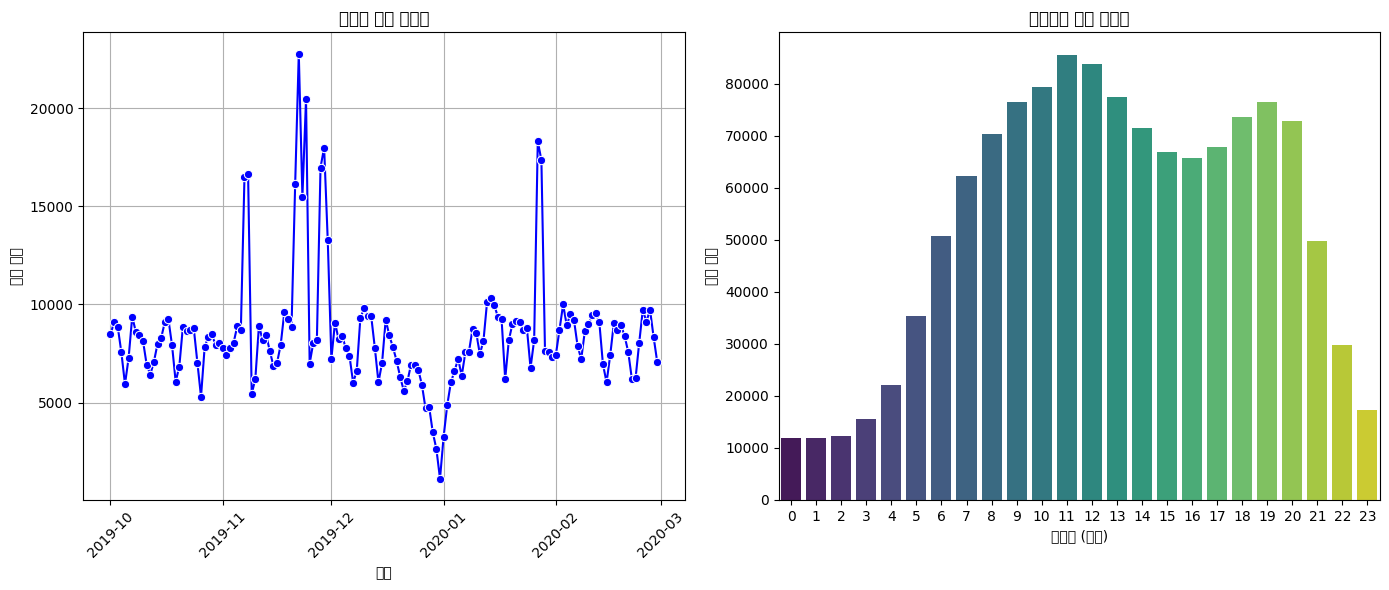

In [ ]:
plt.figure(figsize=(14, 6))

# 날짜별 구매 트렌드 그래프
plt.subplot(1, 2, 1)
sns.lineplot(x=daily_trends.index, y=daily_trends.values, marker='o', color='b')
plt.title('날짜별 구매 트렌드')
plt.xlabel('날짜')
plt.ylabel('구매 횟수')
plt.xticks(rotation=45)
plt.grid(True)

# 시간대별 구매 트렌드 그래프
plt.subplot(1, 2, 2)
sns.barplot(x=hourly_trends.index, y=hourly_trends.values, palette='viridis')
plt.title('시간대별 구매 트렌드')
plt.xlabel('시간대 (시간)')
plt.ylabel('구매 횟수')

plt.tight_layout()
plt.show()

<ipython-input-111-ffb9587ea0a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_trends.index, y=weekday_trends.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU})

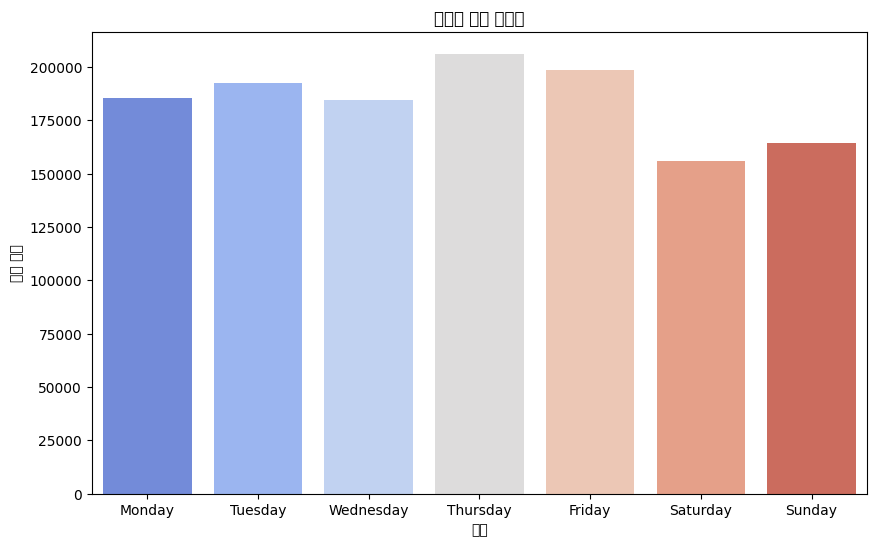

In [ ]:
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'])

# 요일별 구매 트렌드 분석
purchase_df['weekday'] = purchase_df['event_time'].dt.day_name()  # 요일 이름 추출
weekday_trends = purchase_df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

# 시각화
plt.figure(figsize=(10, 6))

# 요일별 구매 트렌드 그래프
sns.barplot(x=weekday_trends.index, y=weekday_trends.values, palette='coolwarm')
plt.title('요일별 구매 트렌드')
plt.xlabel('요일')
plt.ylabel('구매 횟수')

plt.show()

In [ ]:
#판매된 브랜드
purchase_df['brand'].nunique()

250

In [ ]:
#전체 브랜드
df['brand'].nunique()

273

In [ ]:
brand_price_sum = purchase_df.groupby('brand')['price'].sum().sort_values(ascending=False)
brand_price_sum

,price
brand,
runail,343433.19
grattol,266295.94
irisk,223903.38
uno,190719.46
strong,151941.80
...,...
ovale,16.12
pilaten,8.09
rocknailstar,6.66


<ipython-input-140-c735855b4fb6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_price_sum.index, y=brand_price_sum.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU

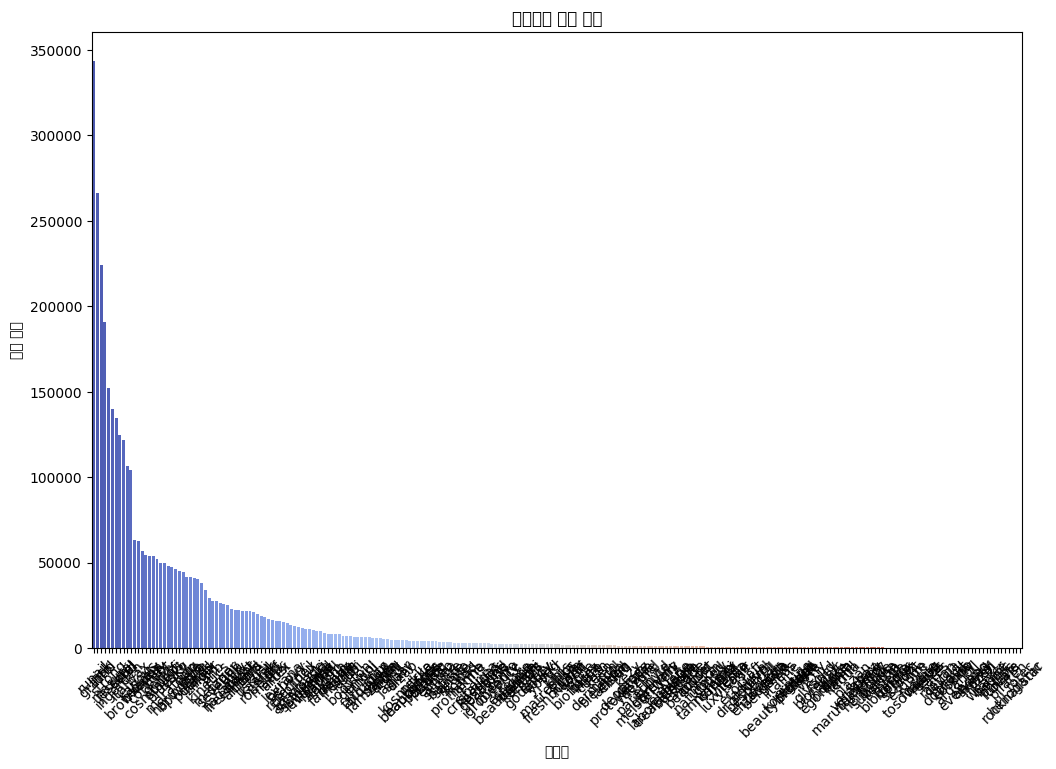

In [ ]:
plt.figure(figsize=(12, 8))

# 각 브랜드별 판매 건수 막대 그래프
sns.barplot(x=brand_price_sum.index, y=brand_price_sum.values, palette='coolwarm')
plt.title('브랜드별 판매 건수')
plt.xlabel('브랜드')
plt.ylabel('판매 건수')

# X축 레이블을 45도 회전
plt.xticks(rotation=45)

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

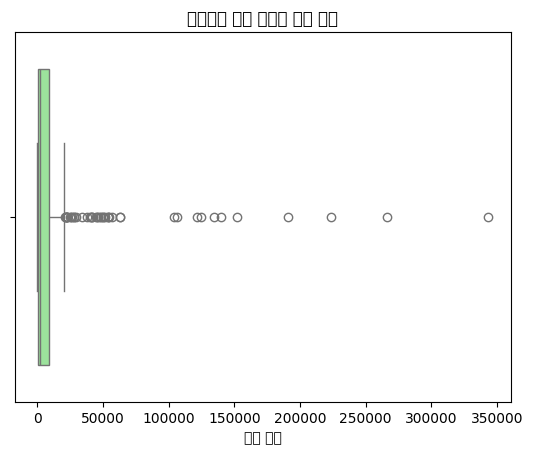

In [ ]:
sns.boxplot(x=brand_price_sum, color='lightgreen')
plt.title('브랜드별 가격 합계의 박스 플롯')
plt.xlabel('가격 합계')

plt.show()

In [ ]:
brand_price_sum.head(10)

,price
brand,
runail,343433.19
grattol,266295.94
irisk,223903.38
uno,190719.46
strong,151941.80
masura,139764.86
jessnail,134775.04
ingarden,124606.04
estel,121788.76


## 8/26 구매 유저 대상

In [21]:
df=pd.read_csv('/content/purchase.csv')

In [22]:
df.describe()

,product_id,category_id,price,user_id
count,11569780.00,11569780.00,11569780.00,11569780.00
mean,5495844.39,1552621909871957760.00,6.51,506863481.65
std,1282353.16,166636559501086208.00,14.23,92132905.09
min,3752.00,1487580004807082752.00,-79.37,9794320.00
25%,5725679.00,1487580005671109376.00,1.87,464074120.00
50%,5811708.00,1487580008145748992.00,3.92,538368226.00
75%,5857355.00,1487580013053083904.00,6.03,569359068.00
max,5932595.00,2242903426784559104.00,327.78,622073202.00


In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203.0,1.487580e+18,NaN,runail,2.62,463240011.0,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353.0,1.487580e+18,NaN,runail,2.62,463240011.0,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589.0,2.151191e+18,NaN,lovely,13.48,429681830.0,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490.0,1.487580e+18,NaN,runail,2.62,463240011.0,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449.0,1.487580e+18,NaN,lovely,0.56,429681830.0,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [7]:
df['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

### 전체 퍼널

In [28]:
# event_type을 기준으로 각 세션에서의 unique한 event_type을 집계
funnel = df.groupby(['user_session', 'event_type']).size().unstack(fill_value=0)

# 각 단계별 전환율 계산
total_sessions = len(funnel)
view_to_cart = (funnel['cart'] > 0).sum() / total_sessions
cart_to_purchase = (funnel['purchase'] > 0).sum() / total_sessions

# 퍼널 분석 결과 출력
print(f"Total Sessions: {total_sessions}")
print(f"View to Cart Conversion Rate: {view_to_cart:.2%}")
print(f"Cart to Purchase Conversion Rate: {cart_to_purchase:.2%}")

# 각 단계별 세션 수
print("\nFunnel breakdown:")
print(funnel)

Total Sessions: 1407260
View to Cart Conversion Rate: 37.63%
Cart to Purchase Conversion Rate: 11.06%

Funnel breakdown:
event_type                            cart  purchase  remove_from_cart  view
user_session                                                                
0000061d-f3e9-484b-8c73-e54f355032a3     0         0                 0     1
000013d6-68a4-40cf-9452-6577dbfab515     1         9                 8     2
00002b0e-d7f7-454e-8386-431c4021a9f6    20         0                 9    10
00002f36-401d-4bc5-bac6-1a683f52ac2b     0         0                 0     1
00004c7d-9507-474e-a559-0fdaccaaa390     0         0                 0     1
...                                    ...       ...               ...   ...
ffffd3f5-3fdc-45fb-b122-0469960a9834     0         0                 0     2
ffffdbda-78e9-4684-b895-e79722a658d9     0         0                 0     1
ffffeed4-b0dd-499c-ba8c-213a1ab9f50d     6         0                11    17
fffffa85-9968-4a7c-aac4-beb0a199

<ipython-input-24-7ccf33e5cf55>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stage', y='count', data=funnel_data, palette='Blues_d')


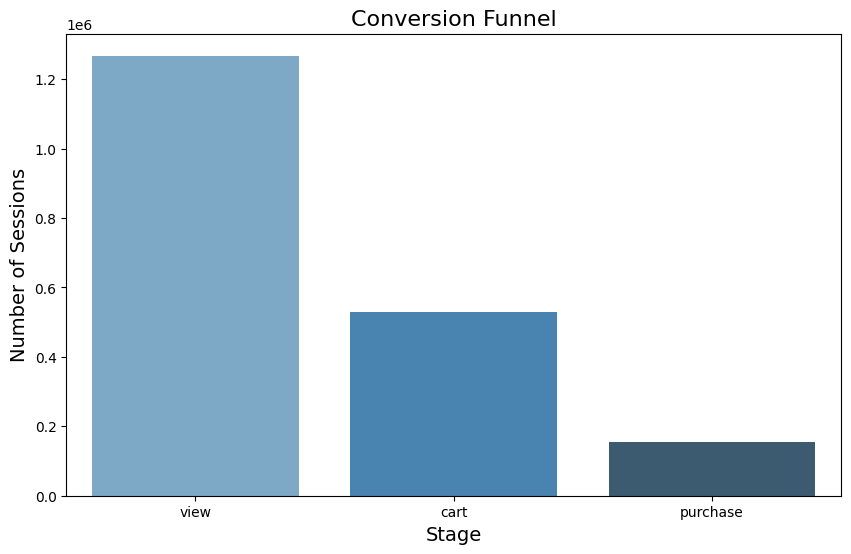

In [24]:

# event_type을 기준으로 각 세션에서의 unique한 event_type을 집계
funnel = df.groupby(['user_session', 'event_type']).size().unstack(fill_value=0)

# 각 단계별 세션 수
funnel_counts = {
    'view': (funnel['view'] > 0).sum(),
    'cart': (funnel['cart'] > 0).sum(),
    'purchase': (funnel['purchase'] > 0).sum()
}

# 퍼널 데이터 준비
funnel_data = pd.DataFrame.from_dict(funnel_counts, orient='index', columns=['count']).reset_index()
funnel_data.rename(columns={'index': 'stage'}, inplace=True)

# 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='stage', y='count', data=funnel_data, palette='Blues_d')

# 그래프 스타일 설정
plt.title('Conversion Funnel', fontsize=16)
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Number of Sessions', fontsize=14)
plt.show()

In [25]:
# event_type을 기준으로 각 세션에서의 unique한 event_type을 집계
funnel = df.groupby(['user_session', 'event_type']).size().unstack(fill_value=0)

# View to Purchase 전환율 계산
view_to_purchase = ((funnel['view'] > 0) & (funnel['purchase'] > 0)).sum() / (funnel['view'] > 0).sum()

# 결과 출력
print(f"View to Purchase Conversion Rate: {view_to_purchase:.2%}")

View to Purchase Conversion Rate: 9.18%


In [26]:
# 전체 이벤트 수
total_events = len(df)

# remove_from_cart 이벤트 수
remove_from_cart_events = df[df['event_type'] == 'remove_from_cart'].shape[0]

# remove_from_cart 비율 계산
remove_from_cart_ratio = remove_from_cart_events / total_events

# 결과 출력
print(f"Total Events: {total_events}")
print(f"Remove from Cart Events: {remove_from_cart_events}")
print(f"Remove from Cart Ratio: {remove_from_cart_ratio:.2%}")

Total Events: 11569780
Remove from Cart Events: 2640813
Remove from Cart Ratio: 22.83%


In [27]:
# 전체 이벤트 수 계산
total_events = len(df)

# 각 이벤트의 수 계산
event_counts = df['event_type'].value_counts()

# 각 이벤트의 비율 계산
event_ratios = event_counts / total_events

# 결과 출력
print("Event Counts:")
print(event_counts)
print("\nEvent Ratios:")
print(event_ratios.apply(lambda x: f"{x:.2%}"))

Event Counts:
event_type
view                4214620
cart                3427340
remove_from_cart    2640813
purchase            1287007
Name: count, dtype: int64

Event Ratios:
event_type
view                36.43%
cart                29.62%
remove_from_cart    22.83%
purchase            11.12%
Name: count, dtype: object


### 브랜드별 퍼널


#### user_session을 활용한 경우

In [34]:
# 브랜드별 세션에서 발생한 이벤트 유형별 개수 집계
funnel = df.groupby(['brand', 'user_session', 'event_type']).size().unstack(fill_value=0)

# 브랜드별 퍼널 계산
brand_funnel = funnel.groupby('brand').agg({
    'view': lambda x: (x > 0).sum(),
    'cart': lambda x: (x > 0).sum(),
    'purchase': lambda x: (x > 0).sum()
})

# 브랜드별 퍼널 비율 계산
brand_funnel_ratio = brand_funnel.div(brand_funnel['view'], axis=0)

# 결과 출력
print("Brand Funnel Counts:")
print(brand_funnel)
print("\nBrand Funnel Ratios:")
print(brand_funnel_ratio.apply(lambda x: x.apply(lambda y: f"{y:.2%}")))

Brand Funnel Counts:
event_type       view   cart  purchase
brand                                 
airnails         5747   4197      2060
almea             829    233       126
andrea             89     20         6
ardell           3457   1243       612
arganoil           79     21         4
art-visage       7099   6281      3337
artex            4999   2907      1322
aura              238    171        73
australis          24      0         0
avene             429    137        46
babyliss          600     94        41
balbcare          943    438       255
barbie             13      9         4
barex             328    151        73
batiste           540    516       302
beautific         539    126        32
beautix         12021   5304      2180
beauty-free      3675   1864       678
beautyblender     122     31        19
beauugreen        522    254       126
benovy           2756   3535      1995
bergamo           318    209        91
bespecial         667    122        58
biel

1. 높은 퍼널 비율을 가진 브랜드

뷰에서 카트로의 전환율이 높은 브랜드:

benovy: 128.27%
cosima: 176.92%
dizao: 107.37%
eunyul: 199.02%
nitrile: 128.04%

뷰에서 구매로의 전환율이 높은 브랜드:

eunyul: 104.74%
severina: 104.65%
supertan: 116.56%
shary: 50.17%
vilenta: 43.13%

event_type          brand   cart  purchase  remove_from_cart   view
0                airnails   2834      1833              1951   3060
1                   almea    213       122               130    667
2                  andrea     19         6                14     77
3                  ardell    994       577               627   1977
4                arganoil     18         4                13     61
5              art-visage   4815      3067              2803   4588
6                   artex   2177      1161              1398   3152
7                    aura    162        72                94    198
8               australis      0         0                 1     22
9                   avene    116        45                74    266
10               babyliss     90        39                51    419
11               balbcare    353       227               202    722
12                 barbie      7         3                 6      9
13                  barex    126        69      

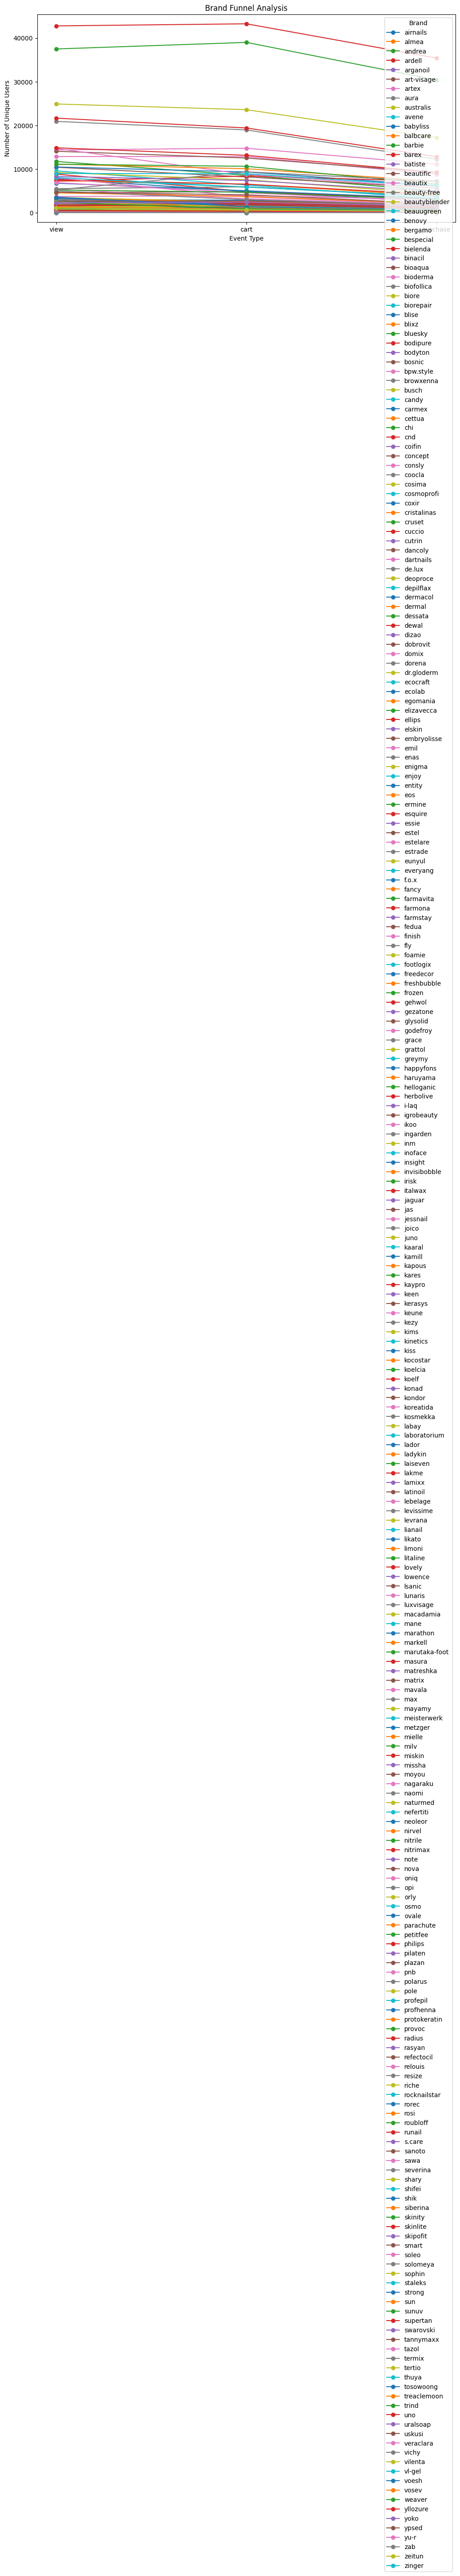

In [35]:

# 퍼널 분석 함수
def funnel_analysis(df):
    # 각 단계별로 브랜드와 이벤트 타입별 사용자 수 집계
    funnel = df.groupby(['brand', 'event_type'])['user_id'].nunique().unstack(fill_value=0)

    # 결과를 데이터프레임으로 변환
    funnel = funnel.reset_index()

    return funnel

# 퍼널 분석 수행
funnel_df = funnel_analysis(df)

# 결과 출력
print(funnel_df)

# 퍼널 시각화
def plot_funnel(df):
    # 각 브랜드별로 퍼널 데이터 준비
    brands = df['brand'].unique()

    fig, ax = plt.subplots(figsize=(12, 6))

    for brand in brands:
        brand_data = df[df['brand'] == brand]
        stages = ['view', 'cart', 'purchase']
        values = [brand_data.get(st, 0) for st in stages]

        ax.plot(stages, values, marker='o', label=brand)

    ax.set_xlabel('Event Type')
    ax.set_ylabel('Number of Unique Users')
    ax.set_title('Brand Funnel Analysis')
    ax.legend(title='Brand')
    plt.show()

# 퍼널 시각화 수행
plot_funnel(funnel_df)

In [33]:
# 브랜드별 이벤트 발생 횟수 계산
brand_funnel = df.groupby(['brand', 'event_type']).size().unstack(fill_value=0)

# 브랜드별 퍼널 비율 계산
brand_funnel_ratio = brand_funnel.div(brand_funnel['view'], axis=0)

# 결과 출력
print("Brand Funnel Counts:")
print(brand_funnel)
print("\nBrand Funnel Ratios:")
print(brand_funnel_ratio.apply(lambda x: x.apply(lambda y: f"{y:.2%}")))

Brand Funnel Counts:
event_type       cart  purchase  remove_from_cart    view
brand                                                    
airnails        16377      7504             12708   10786
almea             357       146               248    1059
andrea             20         6                23     102
ardell           2240       841              1397    5895
arganoil           26         5                26     104
art-visage      12196      4253              6893   10577
artex            4315      1694              3346    7250
aura              219        84               161     303
australis           0         0                 2      26
avene             235        59               149     626
babyliss          130        43                83     870
balbcare         1616       346               494    1264
barbie              9         4                10      13
barex             248        99               155     461
batiste           735       351               439  

구매 전환율이 높은 상위 10개 브랜드

supertan
구매 전환율: 116.56%

eunyul
구매 전환율: 104.74%

cosima
구매 전환율: 107.69%

dizao
구매 전환율: 57.77%

dermal
구매 전환율: 76.72%

nitrimax
구매 전환율: 58.71%

dermacol
구매 전환율: 13.98%

zinger
구매 전환율: 44.03%

cosmoprofi
구매 전환율: 25.28%

skinity
구매 전환율: 47.99%



구매 전환율이 낮은 하위 10개 브랜드

sun
구매 전환율: 0.93%

s.care
구매 전환율: 4.36%

busch
구매 전환율: 0.00%

blise
구매 전환율: 0.00%

laiseven
구매 전환율: 0.00%

embryolisse
구매 전환율: 0.00%

macadamia
구매 전환율: 0.00%

nova
구매 전환율: 0.00%

shifei
구매 전환율: 0.00%

voesh
구매 전환율: 0.00%



### 구매 전환율 상위 브랜드 평균 판매 가격

In [37]:
top_brands = ['supertan', 'eunyul', 'cosima', 'dizao', 'dermal', 'nitrimax', 'dermacol', 'zinger', 'cosmoprofi', 'skinity']

df_purchase=df[df['event_type']=='purchase']

# 상위 10개 브랜드만 필터링
df_top_brands = df_purchase[df_purchase['brand'].isin(top_brands)]

# 브랜드별 평균 가격 계산
average_prices_top_brands = df_top_brands.groupby('brand')['price'].mean().reset_index()

print(average_prices_top_brands)

        brand  price
0      cosima   1.16
1  cosmoprofi   7.68
2    dermacol   9.01
3      dermal   1.22
4       dizao   2.09
5      eunyul   1.10
6    nitrimax   6.32
7     skinity   4.31
8    supertan   0.99
9      zinger   4.21


In [38]:
low_conversion_brands = ['sun', 's.care', 'busch', 'blise', 'laiseven', 'embryolisse', 'macadamia', 'nova', 'shifei', 'voesh']

# 장바구니 이벤트 필터링
df_purchase = df[df['event_type'] == 'purchase']

# 낮은 구매 전환율을 가진 브랜드만 필터링
df_low_brands = df_purchase[df_purchase['brand'].isin(low_conversion_brands)]

# 브랜드별 평균 가격 계산
average_prices_low_brands = df_low_brands.groupby('brand')['price'].mean().reset_index()

print(average_prices_low_brands)

    brand  price
0  s.care  97.24
1     sun  74.14


In [39]:
low_conversion_brands = ['sun', 's.care', 'busch', 'blise', 'laiseven', 'embryolisse', 'macadamia', 'nova', 'shifei', 'voesh']



# 낮은 구매 전환율을 가진 브랜드만 필터링
df_low_brands = df[df['brand'].isin(low_conversion_brands)]

# 브랜드별 평균 가격 계산
average_prices_low_brands = df_low_brands.groupby('brand')['price'].mean().reset_index()

print(average_prices_low_brands)

         brand  price
0        blise  60.32
1        busch  11.24
2  embryolisse  47.86
3     laiseven   8.64
4    macadamia  19.37
5         nova   5.40
6       s.care 100.30
7       shifei   4.68
8          sun  77.27
9        voesh   1.66


### 구매 유저 잔존률

In [40]:
df['event_time'] = pd.to_datetime(df['event_time'])

# 주 단위로 그룹화
df['week'] = df['event_time'].dt.to_period('W').apply(lambda r: r.start_time)

# 각 주의 유저 활동 기록
user_activity = df.groupby(['week', 'user_id']).size().reset_index(name='activity_count')

# 각 주의 유저 집합
user_weekly = user_activity.groupby('week')['user_id'].unique().reset_index(name='user_ids')

# 잔존률 계산을 위한 초기 주 및 잔존 기록
retention_rates = []

# 첫 주와 이후 주를 기준으로 잔존률 계산
weeks = sorted(user_weekly['week'].unique())
for i, week in enumerate(weeks):
    # 현재 주의 유저
    current_week_users = set(user_weekly[user_weekly['week'] == week]['user_ids'].values[0])

    if i == 0:
        # 첫 주의 유저 수
        initial_users = current_week_users
        continue

    # 이전 주
    previous_week = weeks[i-1]
    previous_week_users = set(user_weekly[user_weekly['week'] == previous_week]['user_ids'].values[0])

    # 잔존 유저 수
    retained_users = current_week_users.intersection(previous_week_users)

    # 잔존률 계산
    retention_rate = len(retained_users) / len(initial_users) * 100
    retention_rates.append({
        'week': week,
        'retention_rate': retention_rate
    })

# 결과 데이터프레임
retention_df = pd.DataFrame(retention_rates)

print(retention_df)

<ipython-input-40-e656db370ad0>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['event_time'].dt.to_period('W').apply(lambda r: r.start_time)


         week  retention_rate
0  2019-10-07           44.96
1  2019-10-14           51.17
2  2019-10-21           51.90
3  2019-10-28           52.59
4  2019-11-04           56.60
5  2019-11-11           60.65
6  2019-11-18           66.32
7  2019-11-25           73.37
8  2019-12-02           64.01
9  2019-12-09           59.70
10 2019-12-16           55.77
11 2019-12-23           47.19
12 2019-12-30           36.13
13 2020-01-06           43.41
14 2020-01-13           57.47
15 2020-01-20           62.86
16 2020-01-27           67.52
17 2020-02-03           67.55
18 2020-02-10           61.71
19 2020-02-17           56.39
20 2020-02-24           51.73


## 신규 유저 비율

In [41]:

# 유저의 첫 활동이 발생한 주를 식별
user_first_activity = df.groupby('user_id')['week'].min().reset_index(name='first_activity_week')

# 각 주의 신규 유저 기록
weekly_new_users = df.merge(user_first_activity, left_on='user_id', right_on='user_id')
weekly_new_users = weekly_new_users[weekly_new_users['week'] == weekly_new_users['first_activity_week']]

# 각 주의 신규 유저 집합
weekly_new_users_count = weekly_new_users.groupby('week')['user_id'].nunique().reset_index(name='new_users_count')

# 전체 유저 수
total_users = df.groupby('week')['user_id'].nunique().reset_index(name='total_users_count')

# 주별 신규 유저 비율 계산
weekly_stats = pd.merge(weekly_new_users_count, total_users, on='week')
weekly_stats['new_users_ratio'] = (weekly_stats['new_users_count'] / weekly_stats['total_users_count']) * 100

print(weekly_stats[['week', 'new_users_count', 'total_users_count', 'new_users_ratio']])

         week  new_users_count  total_users_count  new_users_ratio
0  2019-09-30            12213              12213           100.00
1  2019-10-07             9189              14680            62.60
2  2019-10-14             7267              14998            48.45
3  2019-10-21             6220              15075            41.26
4  2019-10-28             5568              15278            36.44
5  2019-11-04             6072              17176            35.35
6  2019-11-11             5233              16807            31.14
7  2019-11-18             6604              20548            32.14
8  2019-11-25             5540              19895            27.85
9  2019-12-02             4264              17029            25.04
10 2019-12-09             4398              17286            25.44
11 2019-12-16             4193              16294            25.73
12 2019-12-23             3556              14205            25.03
13 2019-12-30             2487              11341            2